# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
import pandas as pd
import numpy as np

In [ ]:
airbnb = pd.read_csv("https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/airbnb_hw.csv",index_col=0)
#print(airbnb['Price'].unique(),'\n')
airbnb['Price'] = airbnb['Price'].str.replace(",", "") #remove commas
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric
# Create a missing dummy:
airbnb['price_na'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null
sum(airbnb["price_na"]) #this indicates that there's no missing value in the price variable

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [ ]:
police = pd.read_csv("https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/mn_police_use_of_force.csv", index_col = 0)
print(police['subject_injury'].unique())
police['subject_injury'] = police['subject_injury'].replace(np.nan, "NA") # replace the nan's into "NA" to label them
print(police['subject_injury'].value_counts(), "\n") #9848 missing values

si_na_prop = (police['subject_injury']=='NA').sum()/police.shape[0]
print(si_na_prop) #about 76.2% of the data is missing, might be concerning due to the large proportion


pd.crosstab(police['subject_injury'], police['force_type'])

[nan 'No' 'Yes']


subject_injury
NA     9848
Yes    1631
No     1446
Name: count, dtype: int64 

0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
NA,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172




---


From the table, we can see that for all entries with Force Type "Less Lethal" and "Maximal Restraint Technique" are having missing values for Subject Injury variable. There are no missing values for entries with "Firearm" and "Less Lethal Projectile" Force Type. And we cannot tell any pattern for the other force type categories as those have entries scatters for "Yes", "No", and missing values for their Subject Injury variable.


---

3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [ ]:
justice = pd.read_parquet("https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/justice_data.parquet")
print(justice['WhetherDefendantWasReleasedPretrial'].unique()) #9 mean unclear, so replace them to np.nan
justice['WhetherDefendantWasReleasedPretrial']=justice['WhetherDefendantWasReleasedPretrial'].replace(9,np.nan)
#such we can treat this variable as a Boolean

justice_drp = pd.get_dummies(justice['WhetherDefendantWasReleasedPretrial'], drop_first=True, dtype=int) #drop 0 (Not Released) as the baseline
justice_drp.head()


[9 0 1]


,1.0
0,0
1,0
2,0
3,0
4,1


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [35]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
df = df.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'imposed_sentence',
                          'SentenceTypeAllChargesAtConvictionInContactEvent': 'sentence_type'})
pd.crosstab(df['imposed_sentence'], df['sentence_type'])

sentence_type,0,1,2,4,9
imposed_sentence,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


Before coercion: 
 count     22986
unique      484
top            
freq       9053
Name: imposed_sentence, dtype: object 



<Axes: >

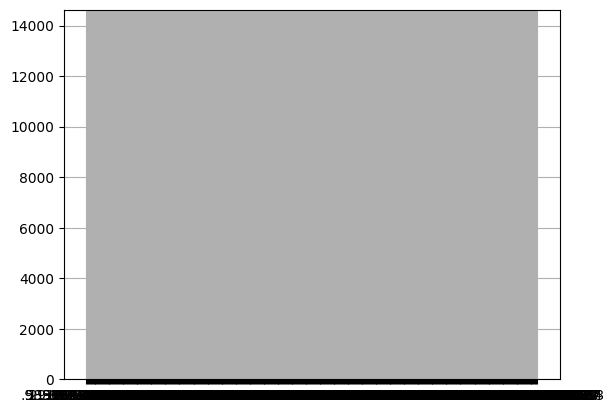

In [36]:
print('Before coercion: \n', df['imposed_sentence'].describe(),'\n') # The imposed sentence variable is not read by Pandas as a number
df['imposed_sentence'].hist(bins=50)
# print(df['imposed_sentence'].unique()) #this helps to find out how the missing values were shown in the data

After coercion: 
 count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: imposed_sentence, dtype: float64 

Total Missings: 
 9053 



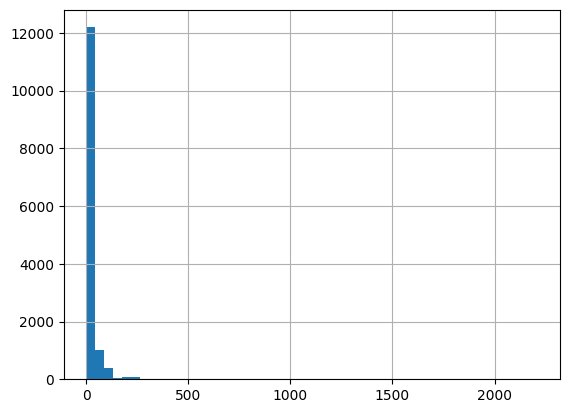

In [40]:
df['imposed_sentence'] = df['imposed_sentence'].replace(" ",np.nan)
df['imposed_sentence'] = pd.to_numeric(df['imposed_sentence']) # Coerce the variable to numeric

# Create a missing dummy:
df['imposed_sentence_nan'] = df['imposed_sentence'].isnull() # Equals 1 if missing, 0 if non-null

In [ ]:
# After coercion:
print('After coercion: \n', df['imposed_sentence'].describe(),'\n') # Describe the numeric variable
df['imposed_sentence'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['imposed_sentence_nan']),'\n')
pd.crosstab(df['imposed_sentence'], df['sentence_type'])

---
From the two cross-tabulate result, we find that values for the `imposed_sentence` variable are missing if the `sentence_type` have code 4 (deferred, etc.) and 9 (Not applicable (e.g., disposition record not found, or unknown) ).

The missing values were handled as `np.nan` for the `imposed_sentence` variable, with a missing dummy variable `imposed_sentence_nan` to help flag out them.


---

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)